In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('w241_updated_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,treatment,age,sex,ethnicityAsian,num_completed,accuracy
0,1,0,61.0,Female,0,5,0.4
1,2,0,40.0,Female,0,2,0.5
2,3,0,19.0,Male,0,2,1.0
3,4,0,73.0,Female,0,4,0.0
4,5,0,62.0,Female,0,4,1.0


Text(0, 0.5, 'age')

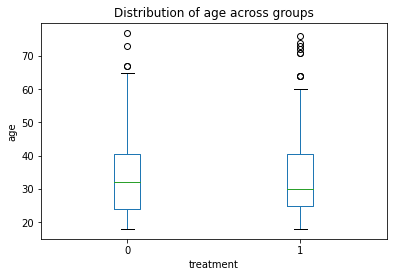

In [4]:
#Boxplot showing age distribution in treatment and control
axes = df.boxplot(grid=False, column = 'age', by = 'treatment')
fig = axes.get_figure()
fig.suptitle('')
plt.title('Distribution of age across groups')
plt.ylabel('age')

[Text(0.5, 0, ''), Text(0.5, 1.0, 'Distribution of sex across groups')]

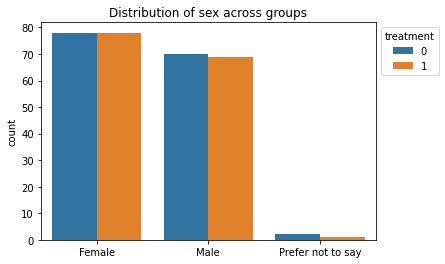

In [5]:
p = sns.countplot(data=df, x='sex', hue='treatment')
p.legend(title='treatment', bbox_to_anchor=(1, 1), loc='upper left')
p.set(xlabel='', title = 'Distribution of sex across groups')

[Text(0.5, 0, 'Ethnicity_Asian'),
 Text(0.5, 1.0, 'Distribution of ethnicity across groups')]

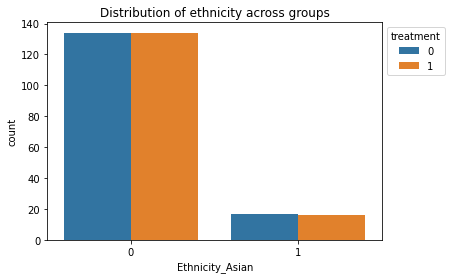

In [6]:
p = sns.countplot(data=df, x='ethnicityAsian', hue='treatment')
p.legend(title='treatment', bbox_to_anchor=(1, 1), loc='upper left')
p.set(xlabel='Ethnicity_Asian', title = 'Distribution of ethnicity across groups')

In [7]:
df.head()

,Unnamed: 0,treatment,age,sex,ethnicityAsian,num_completed,accuracy
0,1,0,61.0,Female,0,5,0.4
1,2,0,40.0,Female,0,2,0.5
2,3,0,19.0,Male,0,2,1.0
3,4,0,73.0,Female,0,4,0.0
4,5,0,62.0,Female,0,4,1.0


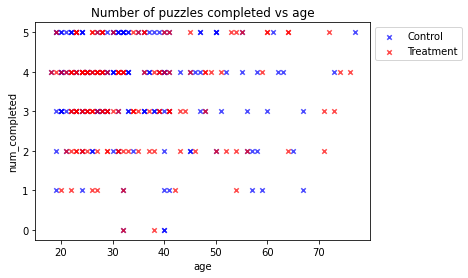

In [8]:
ax1 = df[df['treatment'] == 0].plot(kind='scatter', x='age', y='num_completed', color='b', marker = 'x', 
                                    alpha = 0.7, label = 'Control')

ax2 = df[df['treatment'] == 1].plot(kind='scatter', x='age', y='num_completed', color='r', marker = 'x', alpha = 0.7
                                    , ax = ax1, label = 'Treatment')  
plt.title('Number of puzzles completed vs age')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

Text(0.5, 1.0, 'Number of puzzles completed by group')

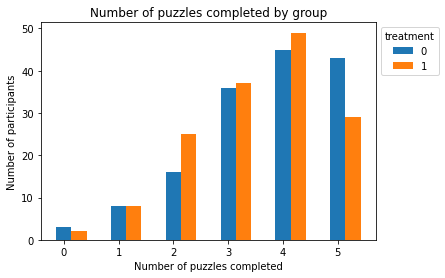

In [9]:
df_hist = df

a_heights, a_bins = np.histogram(df_hist[df_hist['treatment'] == 0].num_completed, bins = 6)
b_heights, b_bins = np.histogram(df_hist[df_hist['treatment'] == 1].num_completed, bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

fig, ax = plt.subplots()

a_bins =[0, 1, 2, 3, 4 ,5 ,6]
ax.bar(a_bins[:-1], a_heights, width=width, label = '0')
ax.bar(a_bins[:-1]+width, b_heights, width=width, label = '1')
plt.legend(title='treatment', bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Number of puzzles completed')
plt.ylabel('Number of participants')
plt.title('Number of puzzles completed by group')

In [10]:
a_bins[:-1]+width

array([0.27777778, 1.27777778, 2.27777778, 3.27777778, 4.27777778,
       5.27777778])

In [11]:
df[df['treatment'] == 0].num_completed.value_counts()

4    45
5    43
3    36
2    16
1     8
0     3
Name: num_completed, dtype: int64

In [12]:
df[df['treatment'] == 1].num_completed.value_counts()

4    49
3    37
5    29
2    25
1     8
0     2
Name: num_completed, dtype: int64

Text(0.5, 1.0, 'Density of accuracy by groups')

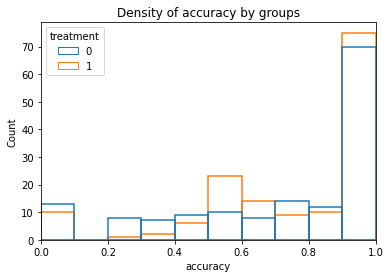

In [17]:
sns.histplot(data=df, x="accuracy", hue="treatment", fill=False, common_norm=False, alpha=0.4)
plt.xlim([0,1])
plt.title('Density of accuracy by groups')

In [14]:
df.accuracy.value_counts()

1.000000    145
0.750000     23
0.000000     23
0.500000     23
0.666667     22
0.800000     22
0.400000     15
0.600000     10
0.333333      9
0.200000      7
0.250000      2
Name: accuracy, dtype: int64

<AxesSubplot:xlabel='accuracy', ylabel='Count'>

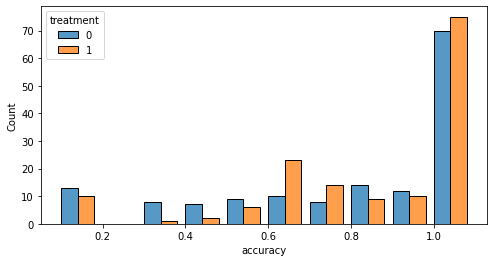

In [26]:
fig, ax = plt.subplots(figsize=(8, 4)) # very wide figure to accomodate 200 bars
sns.histplot(data=df, x='accuracy', hue='treatment', bins=10, shrink=0.8, multiple='dodge', ax=ax)

Text(0.5, 1.0, 'Accuracy')

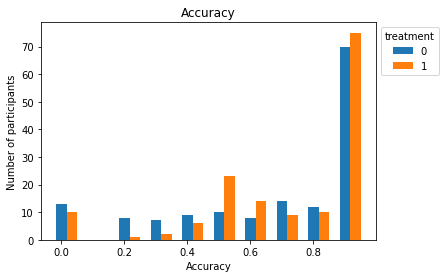

In [10]:
df_hist = df

a_heights, a_bins = np.histogram(df_hist[df_hist['treatment'] == 0].accuracy, bins = 10)
b_heights, b_bins = np.histogram(df_hist[df_hist['treatment'] == 1].accuracy, bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

fig, ax = plt.subplots()


ax.bar(a_bins[:-1], a_heights, width=width, label = '0')
ax.bar(a_bins[:-1]+width, b_heights, width=width, label = '1')
plt.legend(title='treatment', bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Accuracy')
plt.ylabel('Number of participants')
plt.title('Accuracy')

<AxesSubplot:>

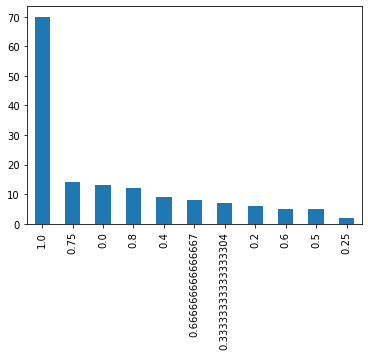

In [35]:
df_hist[df_hist['treatment'] == 0].accuracy.value_counts().plot(kind = 'bar')